# Forecasting Model Evaluation

The task of forecasting the future of the sensor measurements is addressed through the FB's **Prophet** model [1]. The choice is motivated by various reasons:
- *Scalability*: It is designed to handle large datasets efficiently, making it suitable for IoT applications with extensive sensor data.
- *Flexibility*: It can model various seasonal patterns and trends, which are common in sensor data.
- *Robustness*: It can handle missing or spurious data points, which is crucial for practical applications.

The model works in the logspace and is fed with one week of historical data in order to catch the daily seasonality patterns. The evaluation is performed through a train-validation split, where six days out of seven are used for training and one for testing. In this notebook, the default version of the model is analyzed, fitted on an example dataset, which is used also as backup dataset in case of an empty response from querying the Influx database.

The model parameters are tuned to *minimize the forecasting error* and to *avoid catching noise* from the data. In addition, at least in this prototyping phase, there are no specific seasonality patterns in the data, apart from the daily one. However, thinking of a real-world deployment, it is possible that weekly or yearly seasonality patterns could emerge, depending on the specific use case and environment where the IoT devices are deployed.

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.serialize import model_to_json
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from pathlib import Path

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

WORKING_DIR = Path.cwd()
MODELS_DIR = WORKING_DIR.joinpath("forecasting_models")
MODELS_DIR.mkdir(exist_ok=True)
train_split = 0.8571

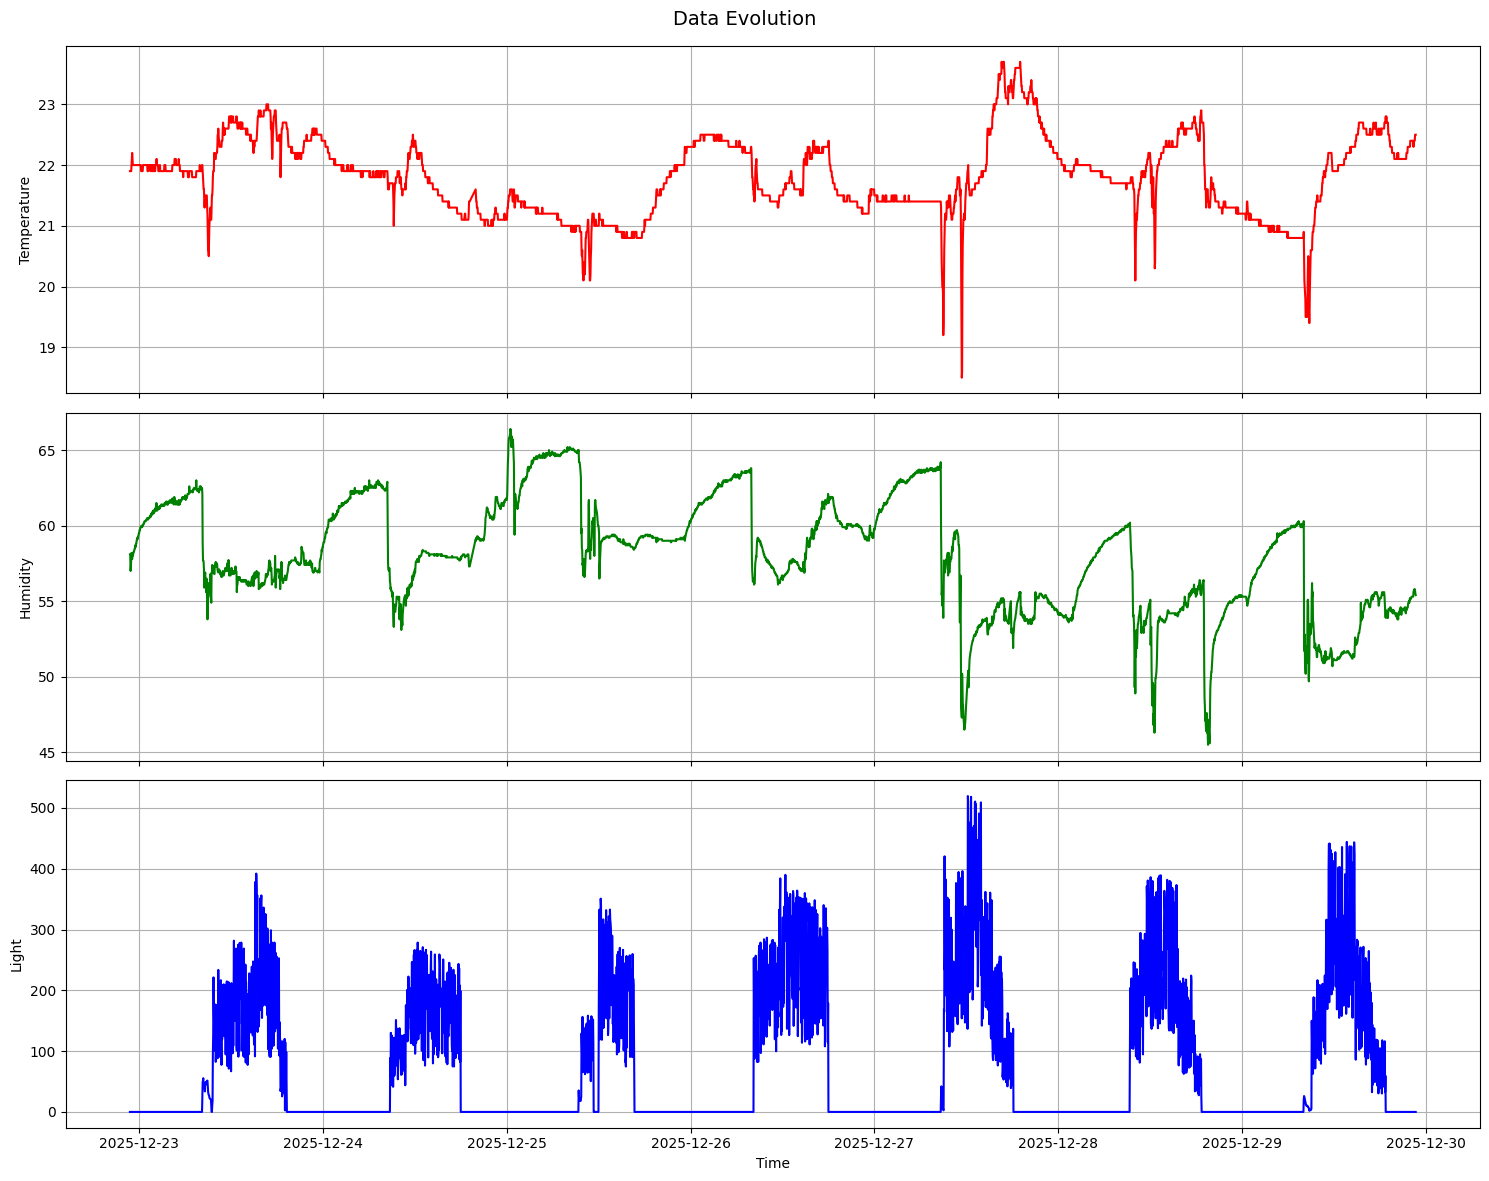

In [164]:
df = pd.read_csv(WORKING_DIR.joinpath('data', 'default_dataset.csv'), parse_dates=['time']).drop(columns=['Unnamed: 0']).sort_values(by="time")
df['ds'] = pd.to_datetime(df['time'])
if df['ds'].dt.tz is not None:
    df['ds'] = df['ds'].dt.tz_localize(None)

fig, axs = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
fig.suptitle('Data Evolution', fontsize=14)

axs[0].plot(df['ds'], df['temperature'], label='Temperature', color='red')
axs[0].set_ylabel('Temperature')
axs[0].grid(True)

axs[1].plot(df['ds'], df['humidity'], label='Humidity', color='green')
axs[1].set_ylabel('Humidity')
axs[1].grid(True)

axs[2].plot(df['ds'], df['light'], label='Light', color='blue')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Light')
axs[2].grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

22:36:23 - cmdstanpy - INFO - Chain [1] start processing
22:36:23 - cmdstanpy - INFO - Chain [1] done processing



FIELD: temperature
  - Root Mean Squared Error (RMSE): 0.7230
  - Mean Absolute Error (MAE): 0.5674
  - R^2 Score: 0.0674


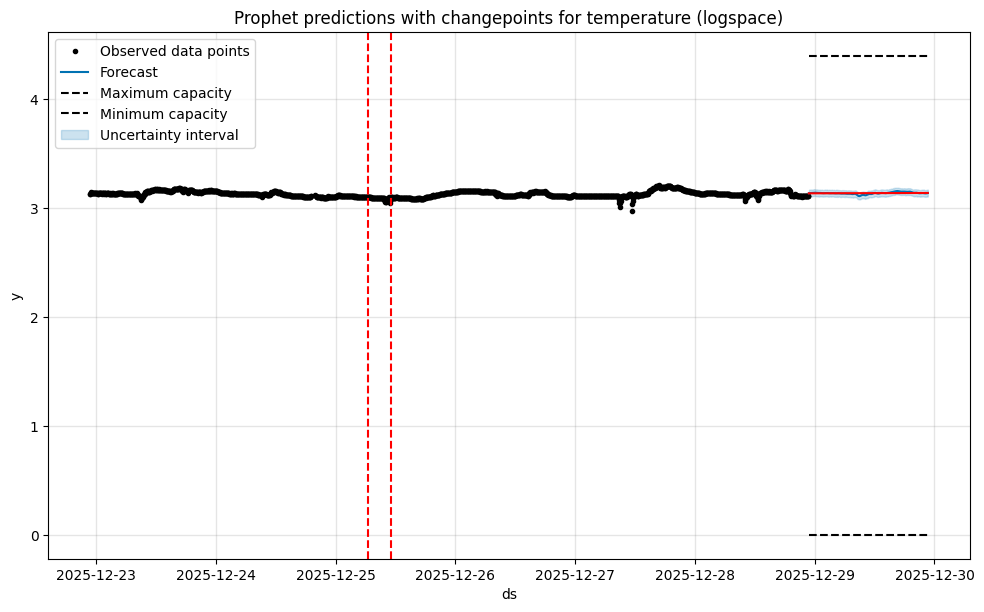

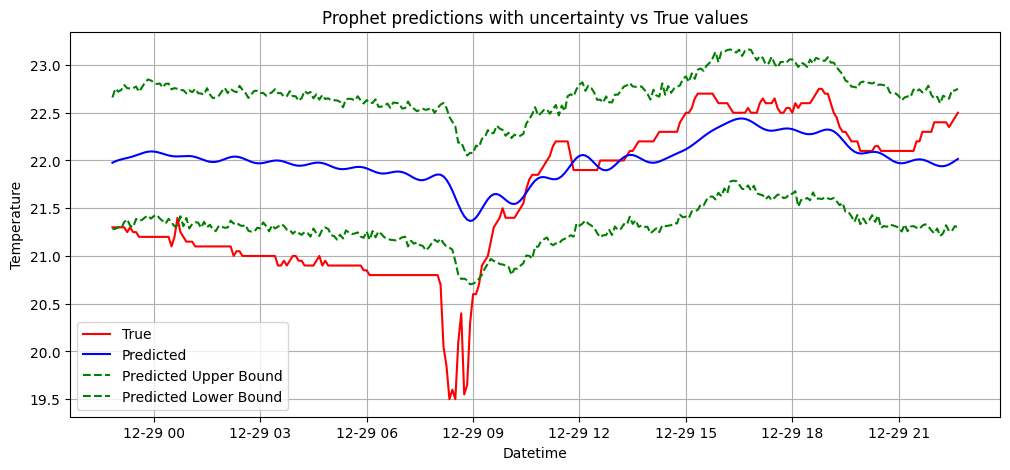

  0%|          | 0/5 [00:00<?, ?it/s]22:36:25 - cmdstanpy - INFO - Chain [1] start processing
22:36:25 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 1/5 [00:00<00:02,  1.53it/s]22:36:25 - cmdstanpy - INFO - Chain [1] start processing
22:36:26 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 2/5 [00:01<00:02,  1.50it/s]22:36:26 - cmdstanpy - INFO - Chain [1] start processing
22:36:26 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 3/5 [00:02<00:01,  1.33it/s]22:36:27 - cmdstanpy - INFO - Chain [1] start processing
22:36:27 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████  | 4/5 [00:03<00:00,  1.16it/s]22:36:28 - cmdstanpy - INFO - Chain [1] start processing
22:36:28 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 5/5 [00:04<00:00,  1.17it/s]


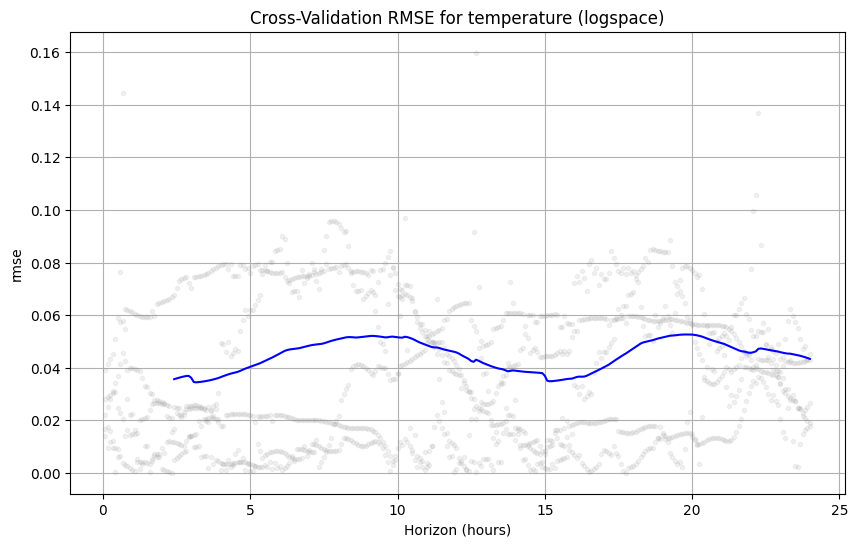

22:36:29 - cmdstanpy - INFO - Chain [1] start processing
22:36:30 - cmdstanpy - INFO - Chain [1] done processing



------------------------------------------------------------



22:36:30 - cmdstanpy - INFO - Chain [1] start processing
22:36:30 - cmdstanpy - INFO - Chain [1] done processing



FIELD: humidity
  - Root Mean Squared Error (RMSE): 1.8260
  - Mean Absolute Error (MAE): 1.3061
  - R^2 Score: 0.5859


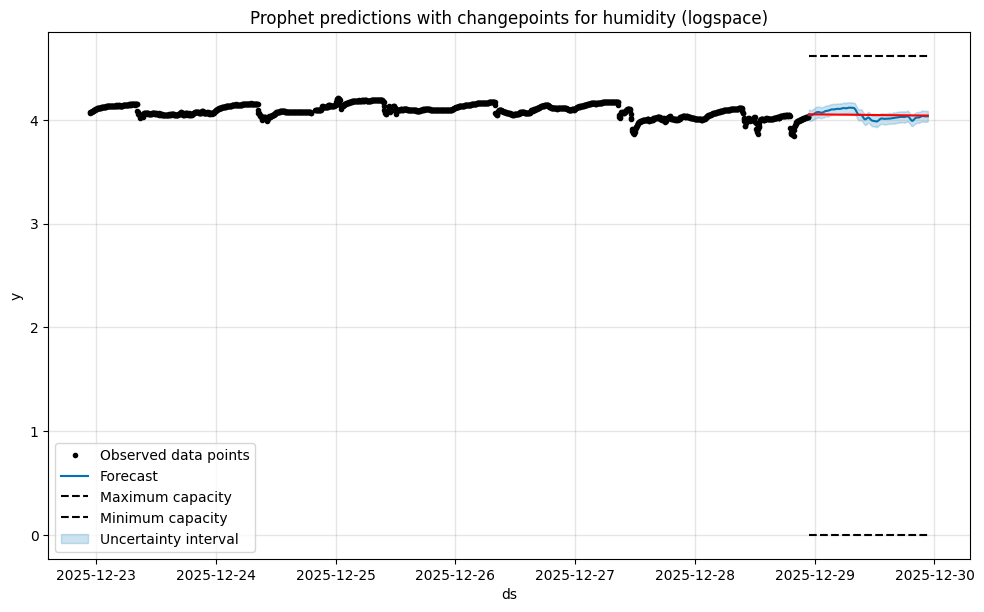

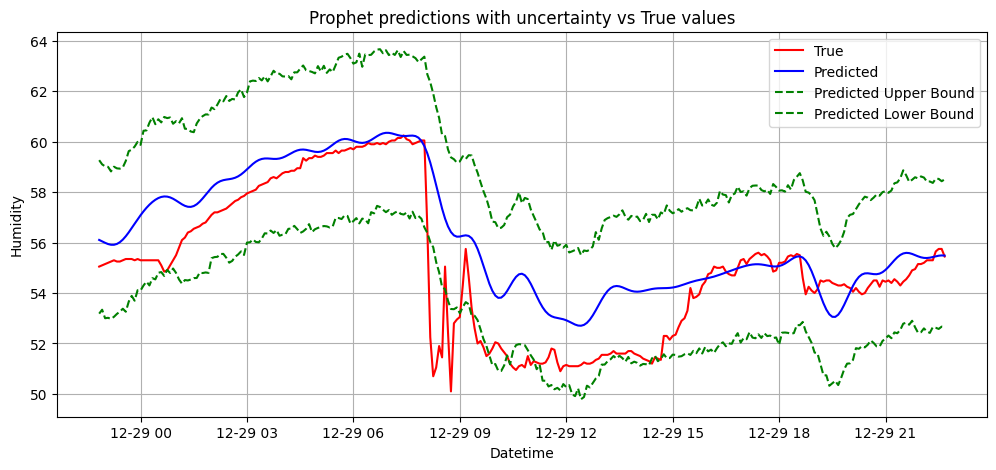

  0%|          | 0/5 [00:00<?, ?it/s]22:36:31 - cmdstanpy - INFO - Chain [1] start processing
22:36:31 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 1/5 [00:00<00:02,  1.76it/s]22:36:32 - cmdstanpy - INFO - Chain [1] start processing
22:36:32 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 2/5 [00:01<00:02,  1.43it/s]22:36:33 - cmdstanpy - INFO - Chain [1] start processing
22:36:33 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 3/5 [00:02<00:01,  1.27it/s]22:36:33 - cmdstanpy - INFO - Chain [1] start processing
22:36:34 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████  | 4/5 [00:03<00:00,  1.19it/s]22:36:34 - cmdstanpy - INFO - Chain [1] start processing
22:36:34 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 5/5 [00:04<00:00,  1.21it/s]


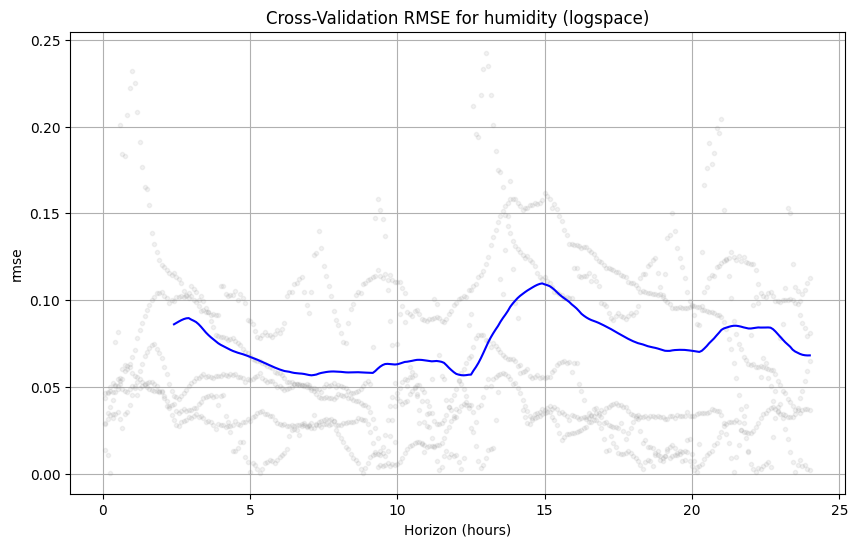

22:36:36 - cmdstanpy - INFO - Chain [1] start processing
22:36:36 - cmdstanpy - INFO - Chain [1] done processing
22:36:36 - cmdstanpy - INFO - Chain [1] start processing



------------------------------------------------------------



22:36:36 - cmdstanpy - INFO - Chain [1] done processing



FIELD: light
  - Root Mean Squared Error (RMSE): 60.1348
  - Mean Absolute Error (MAE): 27.5854
  - R^2 Score: 0.7256


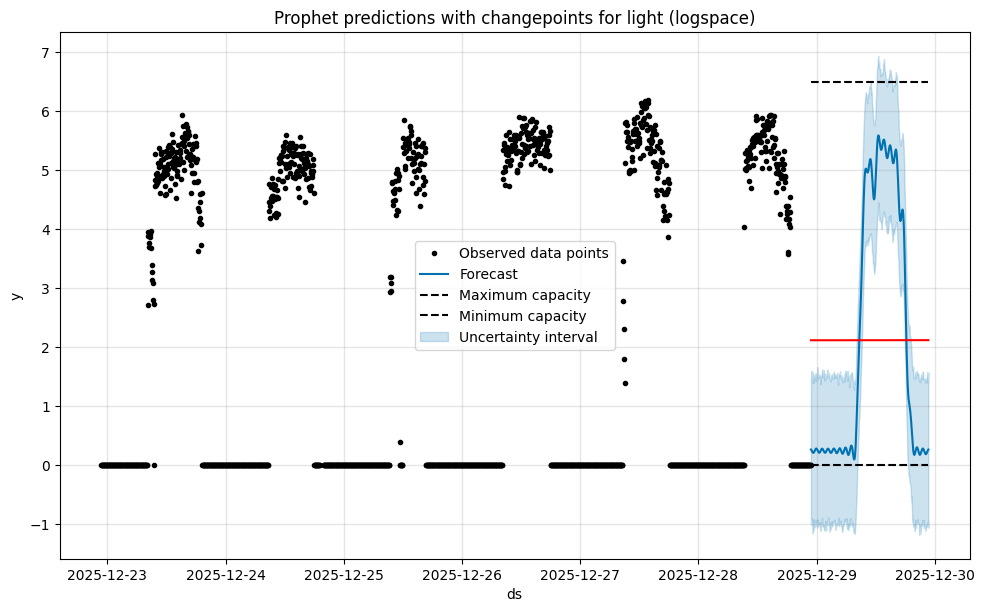

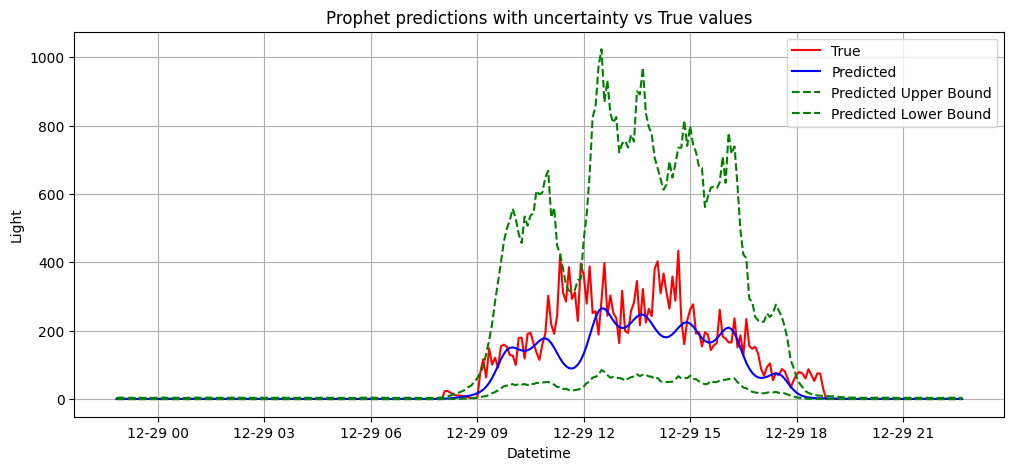

  0%|          | 0/5 [00:00<?, ?it/s]22:36:38 - cmdstanpy - INFO - Chain [1] start processing
22:36:38 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 1/5 [00:00<00:02,  1.55it/s]22:36:38 - cmdstanpy - INFO - Chain [1] start processing
22:36:38 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 2/5 [00:01<00:02,  1.47it/s]22:36:39 - cmdstanpy - INFO - Chain [1] start processing
22:36:39 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 3/5 [00:02<00:01,  1.37it/s]22:36:40 - cmdstanpy - INFO - Chain [1] start processing
22:36:40 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████  | 4/5 [00:02<00:00,  1.34it/s]22:36:41 - cmdstanpy - INFO - Chain [1] start processing
22:36:41 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


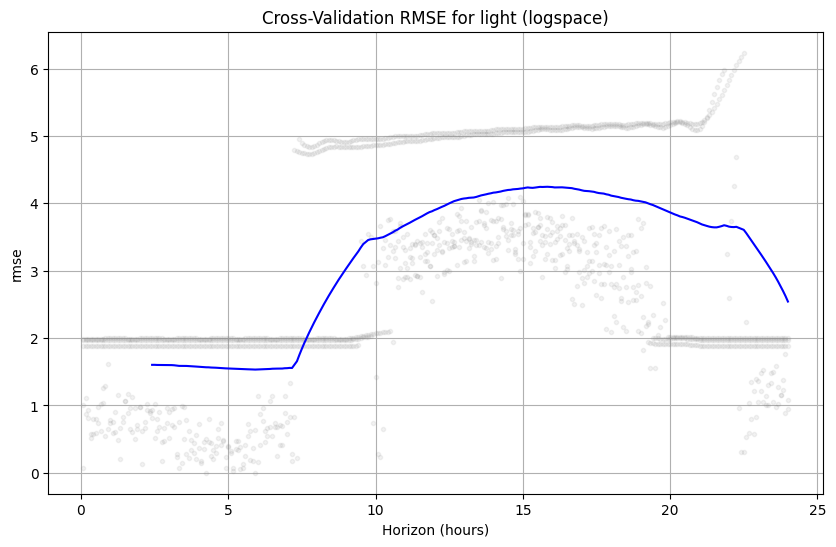

22:36:42 - cmdstanpy - INFO - Chain [1] start processing
22:36:42 - cmdstanpy - INFO - Chain [1] done processing



------------------------------------------------------------



In [160]:
data_forecast = {'node_id': 'smart_art_1'}

for field_name in ['temperature', 'humidity', 'light']:

    lower_bound = 0
    if field_name == 'temperature':
        mode = 'additive'
        upper_bound = 80
    elif field_name =='humidity':
        mode = 'additive'
        upper_bound = 100
    elif field_name == 'light':
        mode = 'multiplicative'
        upper_bound = 660
    upper_bound_log = np.log1p(upper_bound)
    
    df_temp = df[['ds', field_name]].rename(columns={field_name: 'y'})
    df_temp = df_temp.resample('5min', on='ds')['y'].mean().dropna().reset_index()
    df_temp['y'] = np.log1p(df_temp['y'])
    df_temp['floor'] = lower_bound
    df_temp['cap'] = upper_bound_log

    train_split_index = int(train_split * len(df_temp))
    df_train = df_temp.iloc[:train_split_index]
    df_val = df_temp.iloc[train_split_index:].reset_index()

    params = {
        'growth': 'logistic',
        'daily_seasonality': False,
        'weekly_seasonality': False, 
        'yearly_seasonality': False,
        'changepoint_prior_scale': 0.001
    }
    fourier_order_val = 20

    model = Prophet(**params)
    model.add_seasonality(name='daily', period=1, fourier_order=fourier_order_val, mode=mode)
    model.fit(df_train)

    # Future data validation
    forecast_val = model.predict(df_val[['ds', 'floor', 'cap']])
    forecast_val['yhat'] = forecast_val['yhat'].clip(lower=lower_bound, upper=upper_bound_log)
    y_true = np.expm1(df_val['y']).values
    y_pred = np.expm1(forecast_val['yhat']).values
    print(f"\nFIELD: {field_name}")
    print(f"  - Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"  - Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"  - R^2 Score: {r2_score(y_true, y_pred):.4f}")
    
    fig = model.plot(forecast_val)
    add_changepoints_to_plot(fig.gca(), model, forecast_val)
    plt.title(f"Prophet predictions with changepoints for {field_name} (logspace)")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 5))
    plt.plot(df_val['ds'], y_true, 'r', label='True')
    plt.plot(df_val['ds'], y_pred, 'b', label='Predicted')
    plt.plot(df_val['ds'], np.expm1(forecast_val['yhat_upper']), 'g--', label='Predicted Upper Bound')
    plt.plot(df_val['ds'], np.expm1(forecast_val['yhat_lower']), 'g--', label='Predicted Lower Bound')
    plt.xlabel('Datetime')
    plt.ylabel(field_name.capitalize())
    plt.title("Prophet predictions with uncertainty vs True values")
    plt.legend()
    plt.grid()
    plt.show()

    df_cv = cross_validation(model, initial='3 days', period='12 hours', horizon='1 day')
    pm = performance_metrics(df_cv)
    plot_cross_validation_metric(df_cv, metric='rmse')
    plt.title(f"Cross-Validation RMSE for {field_name} (logspace)")
    plt.show()

    # Final model
    def_model = Prophet(**params)
    def_model.add_seasonality(name='daily', period=1, fourier_order=fourier_order_val, mode=mode)
    def_model.fit(df_temp)

    temp_filename = MODELS_DIR.joinpath(f"model_{field_name}_default.json.tmp")
    model_filename = MODELS_DIR.joinpath(f"model_{field_name}_default.json")
    with open(temp_filename, 'w') as fout:
        json.dump(model_to_json(def_model), fout)
    temp_filename.replace(model_filename)

    print("\n------------------------------------------------------------\n")

## Performance Analysis

In the following chapter the model performance is analyzed for each of the three fields: temperature, humidity, and light. It is important to note that the following analysis is conditioned by the inherent characteristics of the current dataset, which was collected in a **partially controlled and unstable environment**, characterized by high-frequency noise and unpredictable variances.

The evaluation is conducted under the following aspects:
- **Error Metrics**: The *Root Mean Squared Error (RMSE)*, *Mean Absolute Error (MAE)* and *$R^2$ score* are computed to quantify the forecasting accuracy.
- **Description Plots**: Visualisations of the predicted vs true values, confidence intervals and cross validation metrics are provided to offer insights into the model's performance.

#### Temperature

As we can see from the observed samples over time, it is the field with the most unstable behavior, with sudden spikes and drops that are difficult to predict, causing the performance to be low in terms of $R^2$ score. This is likely due to the environmental conditions in which the sensors were placed, which may have been subject to rapid changes in temperature. The model, however, manages to capture the overall trend of the data, resulting in reasonable predictions and an error that shifts approximately of $0.6°C$ from the real value in terms of RMSE and MAE. In addition, the prediction and cross validation plots show that the model struggles to follow the seasonality in the early future on the presented validation set and recovers later.

#### Humidity

This field's evolution follows the same behaviour as the temperature, even if showing much more defined patterns. As a reflection, the model has increased its performance both in terms of $R^2$ score and error metrics with respect to temperature, meaning that it correctly captures the trend and the seasonality. This is showed also in the prediction plot, where the ground truth curve is almost entirely covered by the confidence interval of the model output. Also in the cross validation plot the RMSE remains almost stable along the horizon period, with a small increase in the value only between 13 and 17 hours in the future.

#### Light

The light sensor has the most controlled behaviour, according to the day/night cycles, even if it is very noisy with a lot of spikes and oscillations. It is also the reason why the prediction has bigger confidence intervals in the evolution of the future prediction on the validation set. For this specific reason, the model is tuned to follow the trend without matching the spikes and shows encouraging numbers in terms of $R^2$ score. However, the cross validation plot highlights how the RMSE increases considerably after 6/7 hours in the horizon period. Therefore, the data analytics module is scheduled to retrain the models every 6 hours.

## References

[1] Taylor, S. J., & Letham, B. (2018). Forecasting at Scale. *The American Statistician*, 72(1), 37–45. https://doi.org/10.1080/00031305.2017.1380080